In [1]:
#import libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#set the style of seaborn
sns.set(style="whitegrid")

In [3]:
#load the dataset
df = pd.read_csv('D:\Data Science\Project\AlmaBetter projects\EDA\Airbnb\Airbnb NYC 2019.csv')


In [4]:
df.head()  # Display the first few rows of the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.shape  # Display the shape of the dataset

(48895, 16)

In [6]:
df.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.isnull().sum()  # Check for missing values in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#drop rows where 'name' or 'host_name' is null
df.dropna(subset=['name', 'host_name'], inplace=True)

In [9]:
df.isna().sum()  # Check for missing values in the dataset

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
#fill missing values in 'last_review' with 'No Review'
df['last_review'].fillna('No Review', inplace=True)
#fill missing values in 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

In [11]:
df.isnull().sum()  # Check for missing values in each column

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
#describe the dataset
df.describe()  # Get a statistical summary of the dataset

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


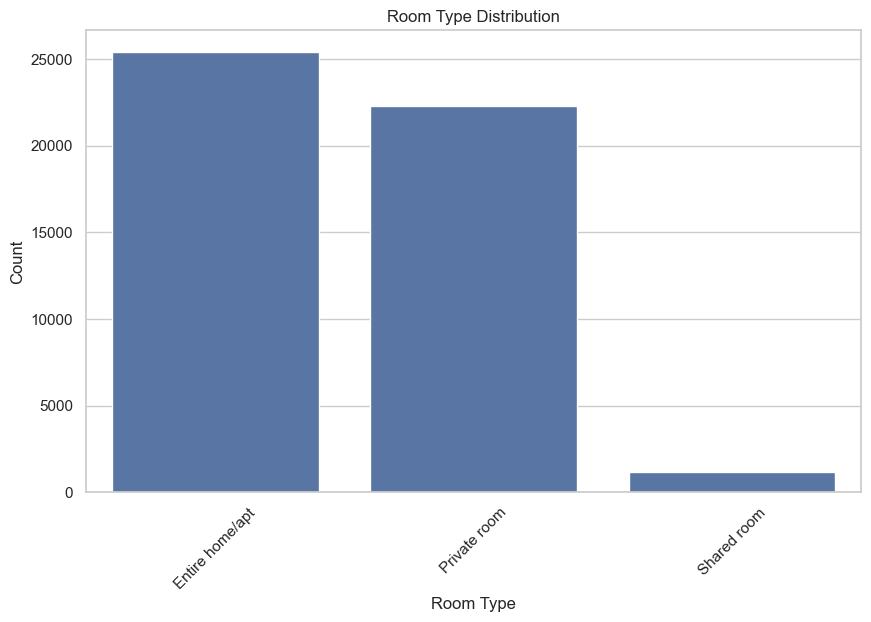

In [ ]:
#Univariate Analysis
#room type distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


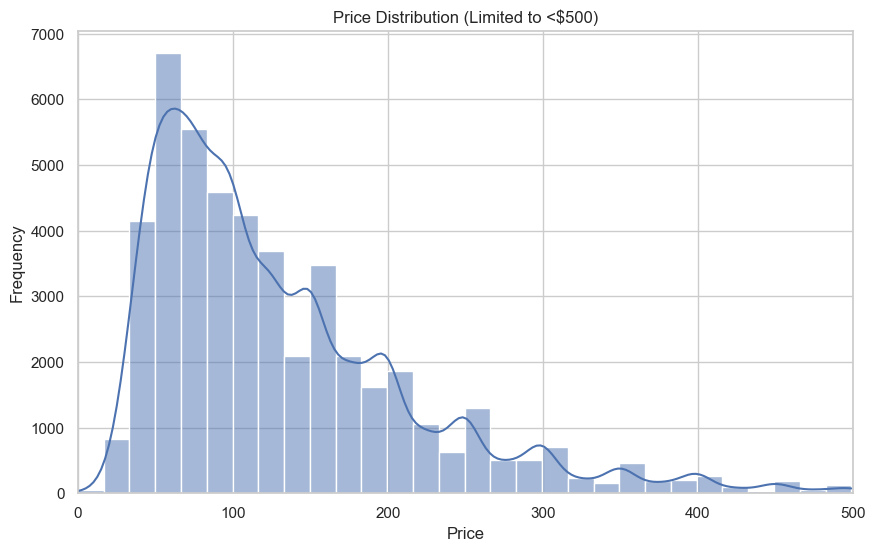

In [14]:
#price distribution (limited to <$500 for better visualization)
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 500]['price'], bins=30, kde=True)
plt.title('Price Distribution (Limited to <$500)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 500)   
plt.show()  

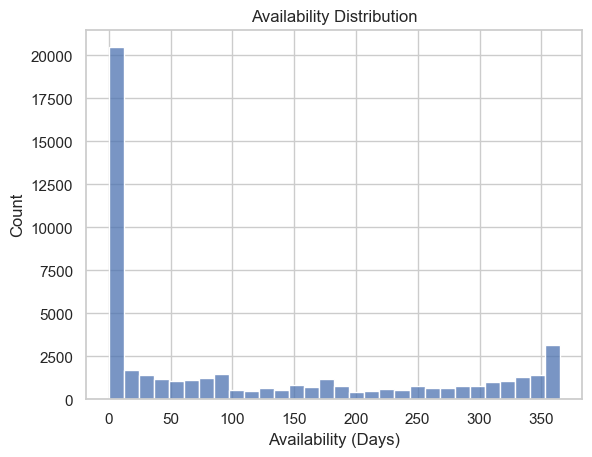

In [15]:
#availability in histogram
#plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30)
plt.title('Availability Distribution')
plt.xlabel('Availability (Days)')
plt.ylabel('Count')
#plt.xlim(0, 365)  # Limit x-axis to 365 days
plt.show()

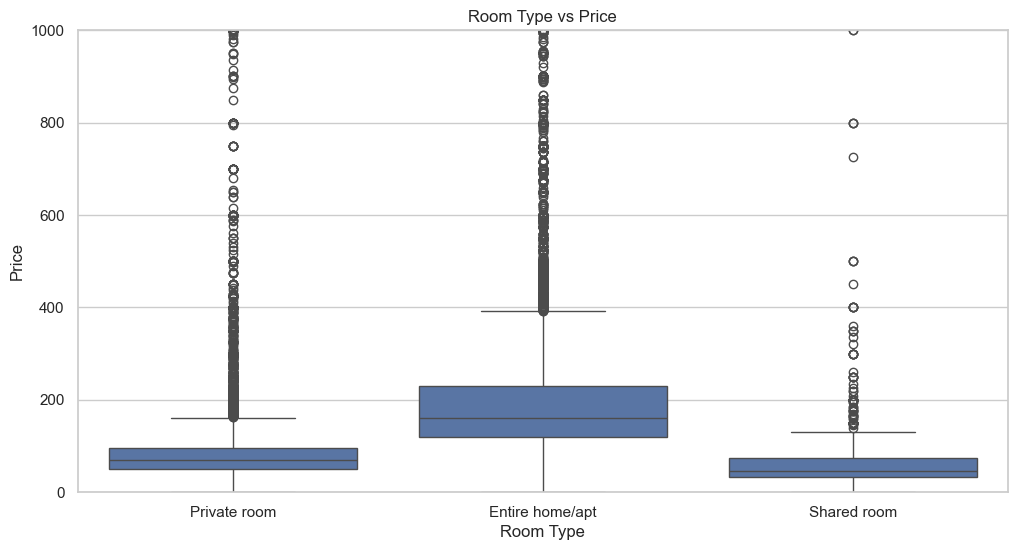

In [16]:
#bivariate Analysis
#room type vs price
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Room Type vs Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Limit y-axis to $1000 for better visualization
plt.show()

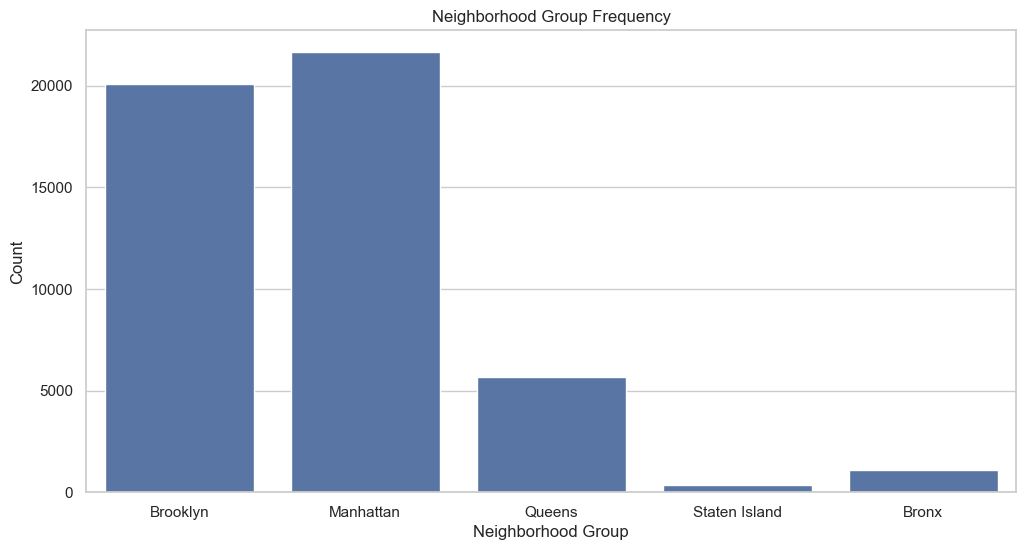

In [17]:
#neighborhood group frequency
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='neighbourhood_group')   
plt.title('Neighborhood Group Frequency')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.show()



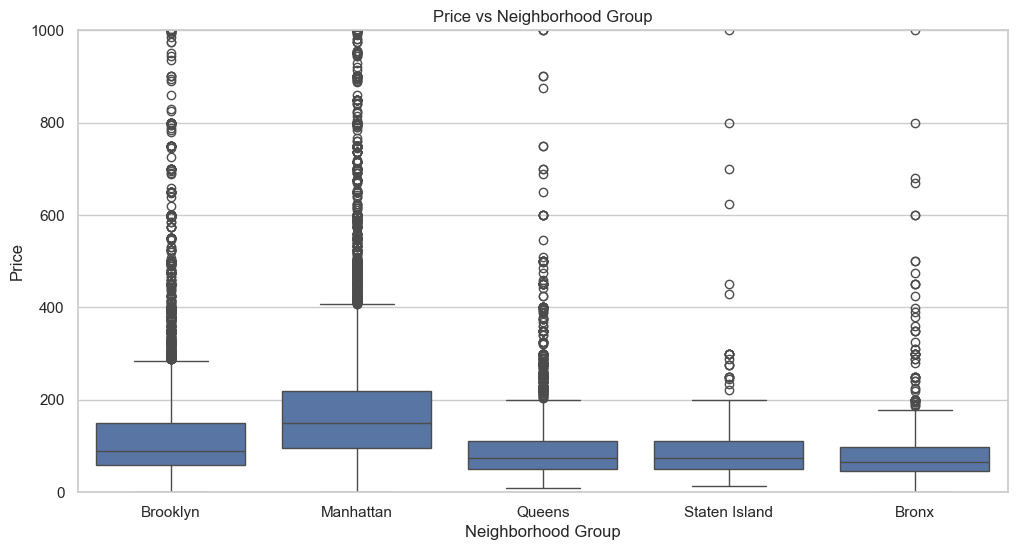

In [18]:
#price vs neighbourhood group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='neighbourhood_group', y='price')
plt.title('Price vs Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.ylim(0, 1000)  # Limit y-axis to $1000 for better visualization
plt.show()

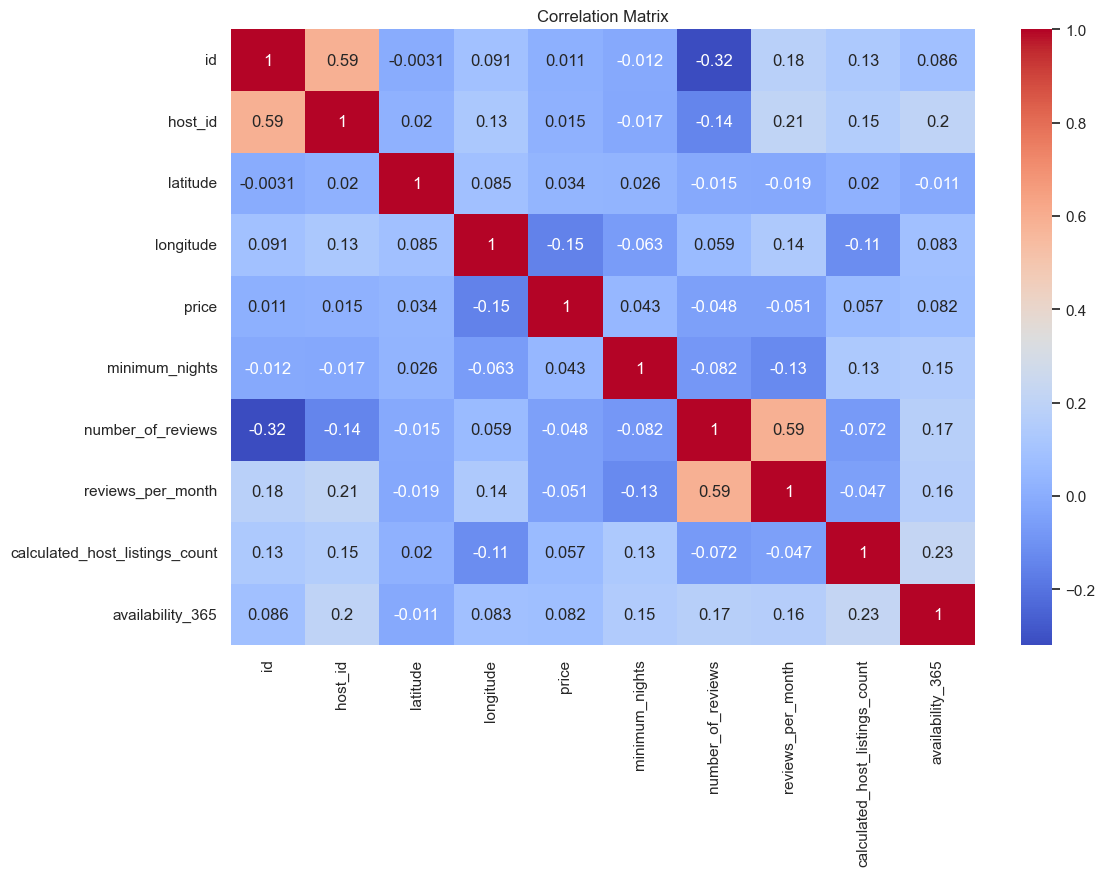

In [19]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

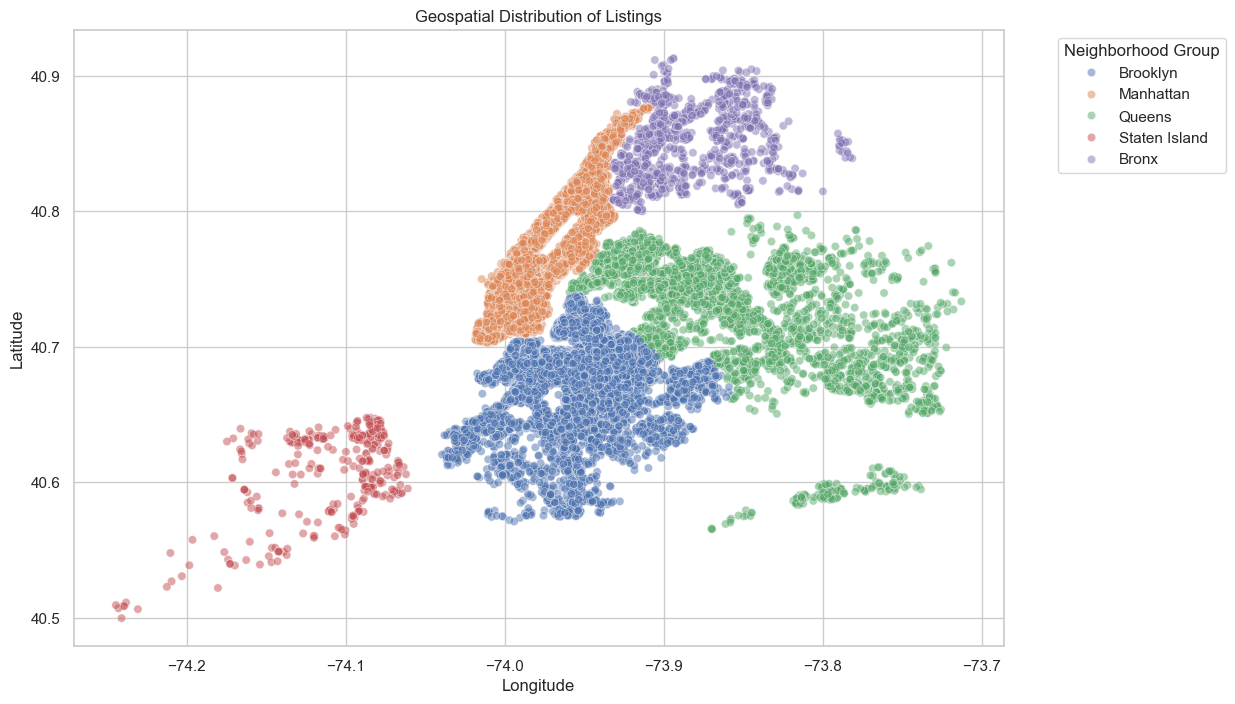

In [ ]:
#geospatial visualization using seaborn's scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)
plt.title('Geospatial Distribution of Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighborhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()